In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
gp_df = pd.read_csv("./googleplaystore.csv")
gp_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [151]:
gp_df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [152]:
shape = gp_df.shape
print(f"Number of rows: {shape[0]}")
print(f"Number of columns: {shape[1]}")

Number of rows: 10841
Number of columns: 13


In [153]:
gp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [154]:
astrology_apps = gp_df["App"].str.contains("astrology", case=False, regex=False)

In [155]:
astrology_apps[astrology_apps.values == True].count()

3

In [156]:
gp_df["Rating"].mean()

4.193338315362443

In [157]:
len(gp_df["Category"].unique())

34

In [158]:
gp_df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [159]:
category_avg_rating = gp_df.groupby(by="Category")["Rating"].mean()
category_avg_rating.sort_values(ascending=False)

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

In [160]:
gp_df[gp_df["Rating"] == 5.0].count()

App               274
Category          274
Rating            274
Reviews           274
Size              274
Installs          274
Type              274
Price             274
Content Rating    274
Genres            274
Last Updated      274
Current Ver       274
Android Ver       274
dtype: int64

In [162]:
gp_df = gp_df.drop(10472)
gp_df["Reviews"] = gp_df["Reviews"].astype("float")

In [163]:
gp_df["Reviews"].mean()

444152.89603321033

In [164]:
gp_df.groupby(by="Type")["App"].count()

Type
Free    10039
Paid      800
Name: App, dtype: int64

In [165]:
gp_df.loc[gp_df["Reviews"] == gp_df["Reviews"].max(), "App"]

2544    Facebook
Name: App, dtype: object

In [166]:
gp_df.sort_values(by="Reviews", ascending=False)[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [167]:
gp_df.drop_duplicates(keep="first", inplace = True)

In [168]:
gp_df.sort_values(by="Reviews", ascending=False)[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [169]:
gp_df.groupby(by="Type").mean()

C:\Users\eddieredmann3\AppData\Local\Temp\ipykernel_476\2577322727.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gp_df.groupby(by="Type").mean()


,Rating,Reviews
Type,,
Free,4.182425,437373.593056
Paid,4.261501,11900.550327


In [172]:
gp_df.sort_values(by="Installs", ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1886,Temple Run 2,GAME,4.3,8119151.0,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
3711,MX Player,VIDEO_PLAYERS,4.5,6474672.0,Varies with device,"500,000,000+",Free,0,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
2603,Snapchat,SOCIAL,4.0,17014705.0,Varies with device,"500,000,000+",Free,0,Teen,Social,"July 30, 2018",Varies with device,Varies with device
1920,Temple Run 2,GAME,4.3,8119154.0,62M,"500,000,000+",Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
4566,SHAREit - Transfer & Share,TOOLS,4.6,7775146.0,17M,"500,000,000+",Free,0,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,CX Network,BUSINESS,NaN,0.0,10M,0+,Free,0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up
5486,AP Series Solution Pro,FAMILY,NaN,0.0,7.4M,0+,Paid,$1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0.0,56M,0+,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0.0,5.5M,0+,Paid,$1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up


In [214]:
contains_plus = gp_df["Installs"].str.contains("+", regex=False)
plusses = contains_plus[contains_plus.values == True]

Personal Insights

In [191]:
gp_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [202]:
category_data = gp_df.groupby(by="Category", as_index=False)["App"].count()
ten_biggest_categories = category_data.sort_values(by="App", ascending=False).head(10)

<AxesSubplot: xlabel='Category', ylabel='App'>

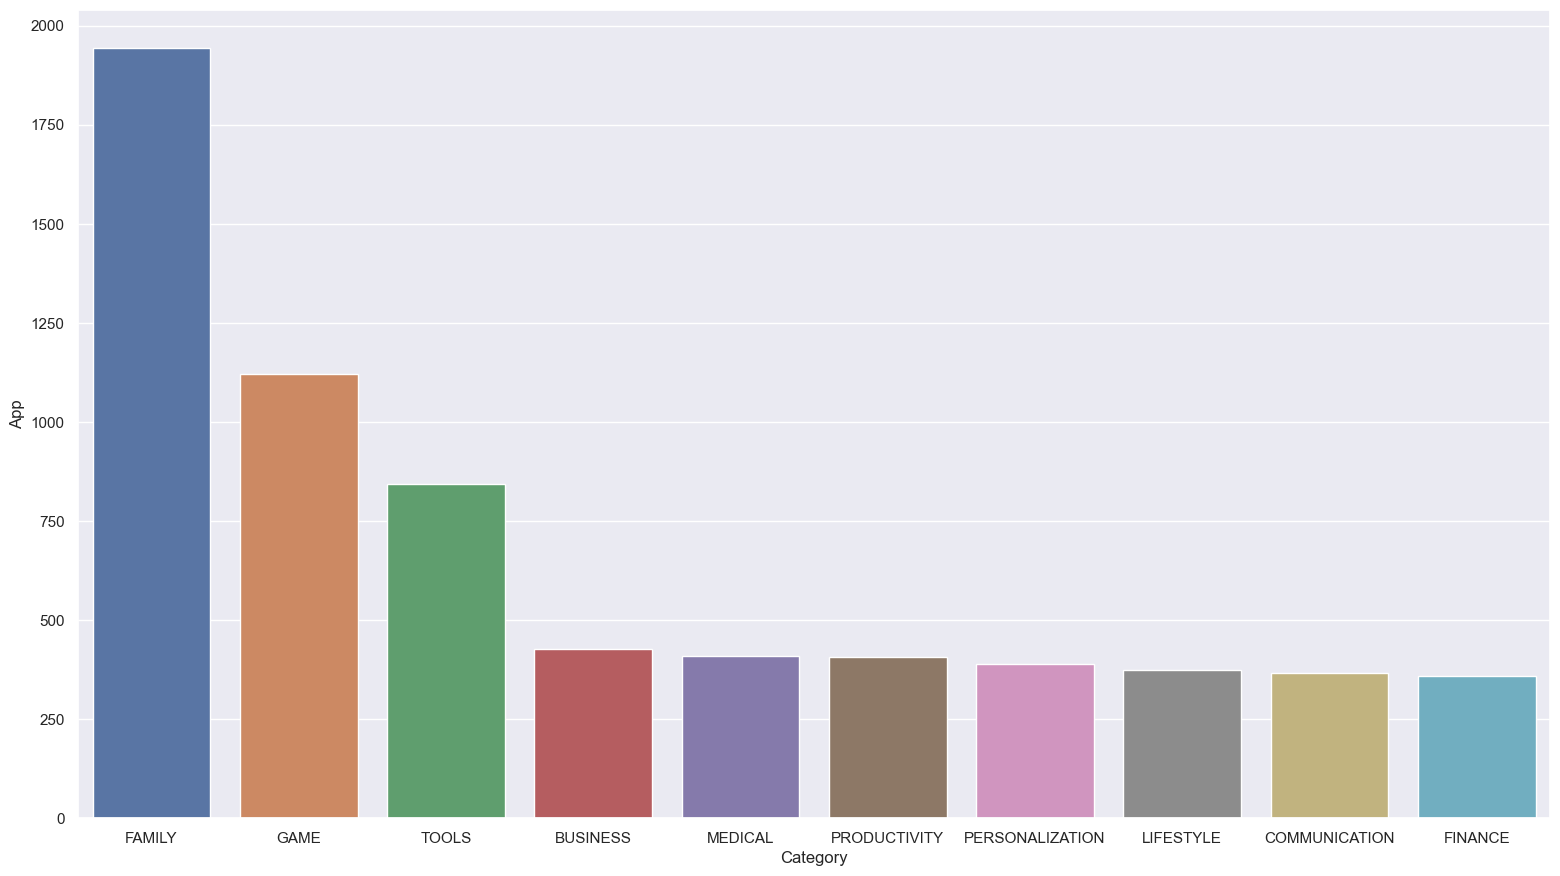

In [203]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=ten_biggest_categories, x="Category", y="App")

In [220]:
review_data = gp_df.groupby(by="Category", as_index=False)["Reviews"].sum()
ten_biggest_reviews = review_data.sort_values(by="Reviews", ascending=False).head(10)
ten_biggest_reviews

,Category,Reviews
14,GAME,1.415537e+09
6,COMMUNICATION,6.012736e+08
27,SOCIAL,5.335768e+08
11,FAMILY,3.967720e+08
29,TOOLS,2.731850e+08
24,PHOTOGRAPHY,2.042974e+08
31,VIDEO_PLAYERS,1.103802e+08
25,PRODUCTIVITY,1.025545e+08
26,SHOPPING,9.493116e+07
23,PERSONALIZATION,7.519316e+07


<AxesSubplot: xlabel='Category', ylabel='Reviews'>

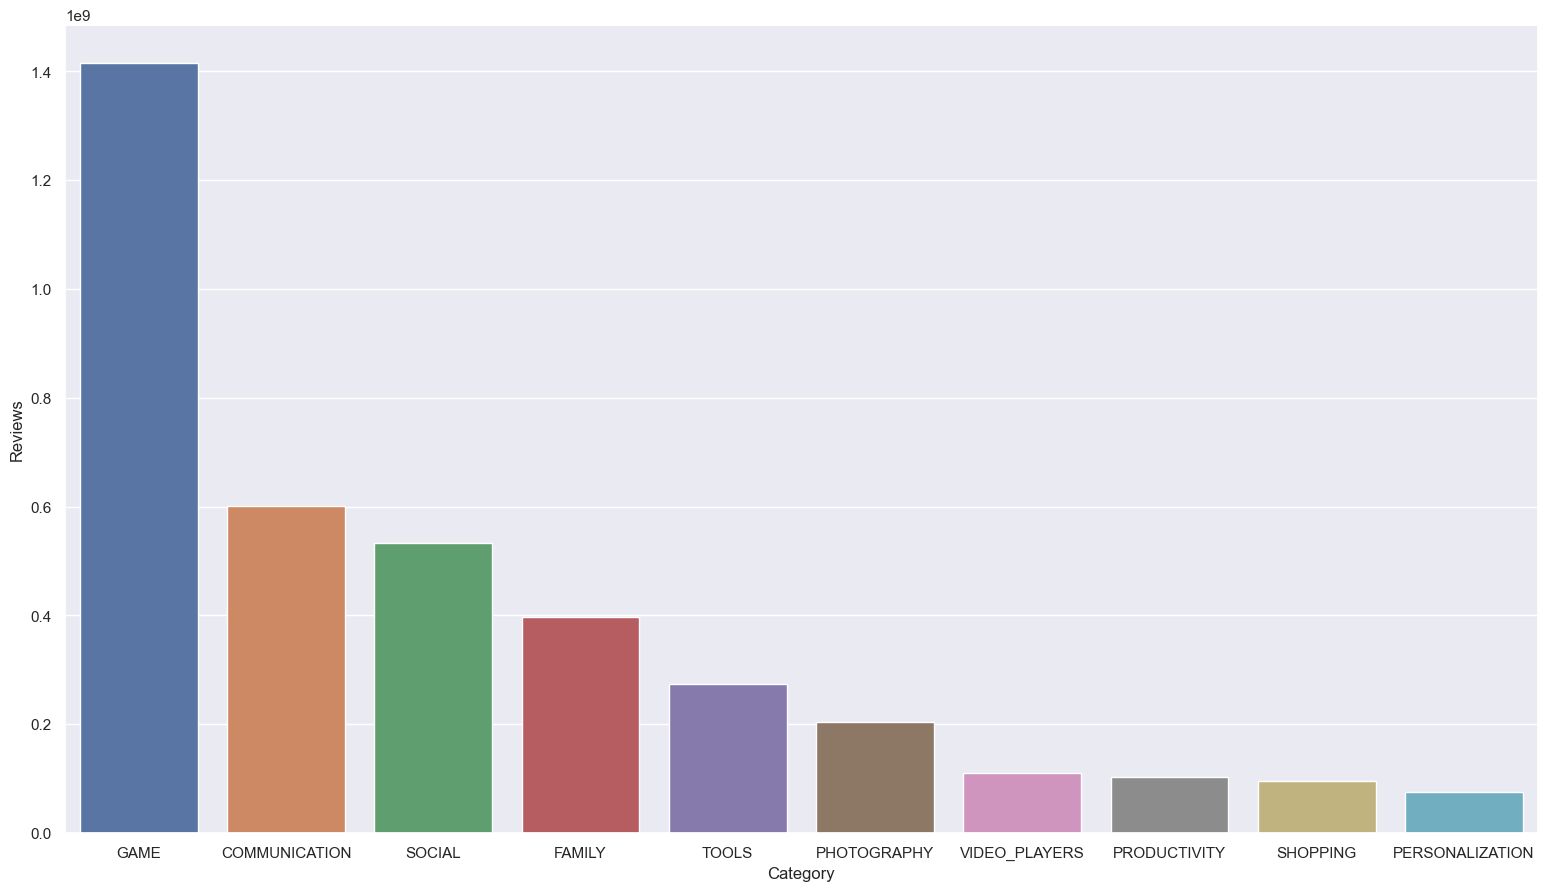

In [222]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=ten_biggest_reviews, x="Category", y="Reviews")

<AxesSubplot: xlabel='Reviews', ylabel='Rating'>

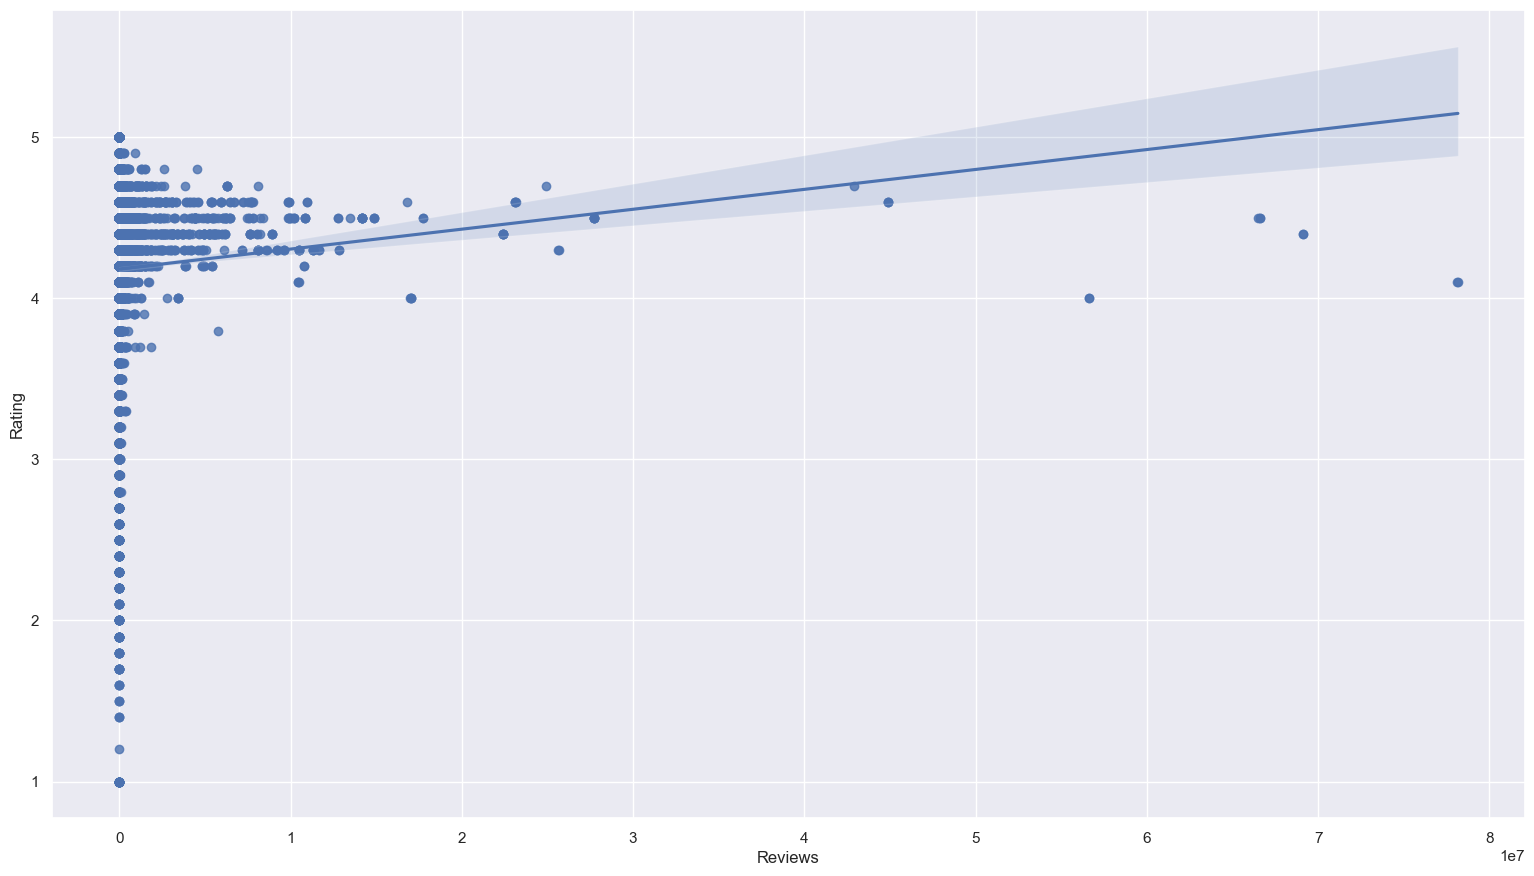

In [224]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.regplot(data=gp_df, x="Reviews", y="Rating")